In [1]:
import cv2 as cv
import os
import re
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_url = '../art'

In [3]:
traditional_dict = {
    os.path.splitext(filename)[0].replace('_', ' ').title(): filename
    for filename in os.listdir('{}/traditional'.format(base_url))
}

modern_dict = {
    os.path.splitext(filename)[0].replace('_', ' ').title(): filename
    for filename in os.listdir('{}/modern'.format(base_url))
}

contemporary_dict = {
    os.path.splitext(filename)[0].replace('_', ' ').title(): filename
    for filename in os.listdir('{}/contemporary'.format(base_url))
}

categories = {
    "traditional": traditional_dict,
    "modern": modern_dict,
    "contemporary": contemporary_dict,
}

In [4]:
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'

def validate_login(email, age):
    if not re.fullmatch(regex, email, re.IGNORECASE):
        return False, "Invalid email, please try again"
    try:
        age = int(age)
        if age < 18:
            return False, "You are too young, sorry"
        return True, "Validation successful"
    except:
      return False, "Invalid age please try again"

In [5]:
def get_category():
    user_input = input("Please enter preferred category and we'll pick one at random for you: ").lower()
    if user_input not in categories:
        return False, 'Invalid category'
    return True, '{}/{}/{}'.format(base_url,user_input, random.choice(list(categories[user_input].values())))

In [6]:
def show_img(index, title, img):
    plt.subplot(1,2,index)
    plt.title(title)
    plt.imshow(img)

In [7]:
def translation(img, x_translate, y_translate):
    rows, cols = img.shape
    M = np.float32([
        [1, 0, x_translate],
        [0, 1, y_translate]
    ])
    return cv.warpAffine(img, M, (cols, rows))

def reflectionX(img):
    rows, cols = img.shape
    M = np.float32([
        [1, 0, 0],
        [0, -1, rows],
        [0, 0, 1]
    ])
    return cv.warpPerspective(img, M, (int(cols), int(rows)))

def rotation(img, degree, scaling_factor):
    rows, cols = img.shape
    return cv.warpAffine(
    img, 
    cv.getRotationMatrix2D(
        (cols/2, rows/2), 
        degree,
        scaling_factor
    ),
    (cols, rows))

def crop(img, y_start, y_end, x_start, x_end):
    return img[y_start:y_end, x_start:x_end]

def shearX(img, shear_value):
    rows, cols = img.shape
    M = np.float32([
        [1, shear_value, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
    return cv.warpPerspective(img, M, (int(cols * 1.5), int(rows * 1.5)))

def shearY(img, shear_value):
    rows, cols = img.shape
    M = np.float32([
        [1, 0, 0],
        [shear_value, 1, 0],
        [0, 0, 1]
    ])
    return cv.warpPerspective(img, M, (int(cols * 1.5), int(rows * 1.5)))

def blurGaussian(img, value_1, value_2):
    value_1 = value_1 + 1 if value_1 % 2 == 0 else value_1
    value_2 = value_2 + 1 if value_2 % 2 == 0 else value_2
    return cv.GaussianBlur(img, (value_1, value_2), 0)

In [8]:
transformations = {
    'translation': {
        'function': translation,
        'params': ['x_translate', 'y_transalate']
    },
    'reflectionx': {
        'function': reflectionX,
        'params': []
    },
    'rotation': {
        'function': rotation,
        'params': ['degree', 'scaling_factor']
    },
    'crop': {
        'function': crop,
        'params': ['y_start', 'y_end', 'x_start', 'x_end']
    },
    'shearx': {
        'function': shearX,
        'params': ['shear_value']
    },
    'shearx': {
        'function': shearY,
        'params': ['shear_value']
    },
    'blurgaussian': {
        'function': blurGaussian,
        'params': ['value_1', 'value_2']
    },
    
}

In [9]:
def list_available_transformations(img):
    print('The available transformations are: {}'.format(', '.join(transformations.keys())))
    user_input = input("Please enter preferred transformation: ").lower()
    if user_input not in transformations:
        print('Invalid transformation')
    else:
        params = [int(input('Provide the value for {}: '.format(value)).strip()) for value in transformations[user_input]['params']]
        new_img = transformations[user_input]['function'](img, *params)
        show_img(2, 'Modified', new_img)

Hello there, the available categories are: traditional, modern, contemporary
The available transformations are: translation, reflectionx, rotation, crop, shearx, blurgaussian


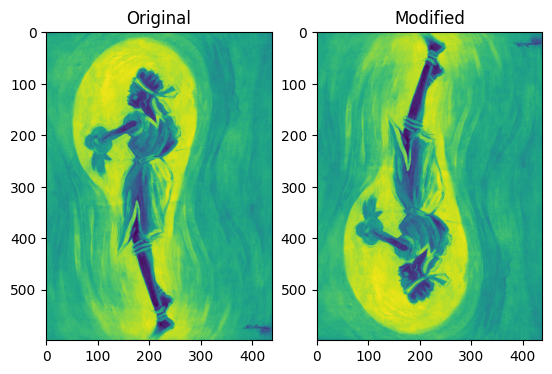

In [11]:
email = input("Please provide your email: ").strip()
age = input("Please provide your age: ").strip()

state, message = validate_login(email, age)
if not state:
    print(message)
else:
    print('Hello there, the available categories are: {}'.format(', '.join(categories.keys())))
    state, result = get_category()
    if not state:
        print(result)
    else:
        img = cv.imread(result, 0)
        show_img(1, 'Original', img)
        
        list_available_transformations(img)